<a href="https://colab.research.google.com/github/Metallicode/Math/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective:**
 You're trying to find the line (in simple linear regression) that best fits a set of data points.

**Cost Function (Mean Squared Error, MSE):**
 This function measures the average squared difference (error) between the predicted values of the line and the actual data points.

**Model/Line Equation:**
 The line is represented as y=a+bx. Here, a is the y-intercept and b is the slope.

**Function of a and b:**
The cost function, MSE, is a function of a and b because the predicted values of the line depend on these parameters. In other words, the value of the MSE changes as
a and b change.

**Partial Derivatives:**
 By taking the partial derivatives of the MSE with respect to a and b, you're determining how the error changes as you adjust each of a and b.

**Setting Partial Derivatives to Zero:**
 When you set these derivatives to zero, you're finding the values of a and
b for which the error is minimized. The rationale behind this is that at the minimum point, the rate of change (i.e., slope of the tangent to the function) is zero.

Result:
The values of a and b that you find from this process are the parameters that define the best-fitting line (in the least squares sense) for your data.

[WIKI - Simple linear regression](https://en.wikipedia.org/wiki/Simple_linear_regression)


[WIKI - Ordinary Least Squares](https://en.wikipedia.org/wiki/Ordinary_least_squares)

In [ ]:
#simple algebra
import sympy as sp

x = sp.symbols('x')
y = sp.symbols('y')
b0 = sp.symbols('b0')
b1 = sp.symbols('b1')

exp = (y - b0 - b1*x)**2

exp

(-b0 - b1*x + y)**2

In [ ]:
expanded = sp.expand(exp)

###Partial Derivatives

In [ ]:
expanded.diff(b1) #NOTIC THE Difference between the original expression and the expanded

2*b0*x + 2*b1*x**2 - 2*x*y

In [ ]:
exp.diff(b1)

-2*x*(-b0 - b1*x + y)

##Partial Derivatives

In [ ]:
import sympy as sp

# Define our symbols
beta_0, beta_1, x_i, y_i = sp.symbols('beta_0 beta_1 x_i y_i')

# The term inside the summation for the MSE
error_term = y_i - beta_0 - beta_1*x_i

# Square the error term to represent the squared error
squared_error = error_term**2

# Compute the partial derivatives
partial_beta_0 = sp.diff(squared_error, beta_0)
partial_beta_1 = sp.diff(squared_error, beta_1)

print("Partial Derivative w.r.t. beta_0:", partial_beta_0)
print("Partial Derivative w.r.t. beta_1:", partial_beta_1)


Partial Derivative w.r.t. beta_0: 2*beta_0 + 2*beta_1*x_i - 2*y_i
Partial Derivative w.r.t. beta_1: -2*x_i*(-beta_0 - beta_1*x_i + y_i)


(2*beta_0 + 2*beta_1*x_i - 2*y_i, -2*x_i*(-beta_0 - beta_1*x_i + y_i))

In [ ]:
partial_beta_0

2*beta_0 + 2*beta_1*x_i - 2*y_i

In [ ]:
partial_beta_1

-2*x_i*(-beta_0 - beta_1*x_i + y_i)

##Using Derivetives to solve MSE

In [ ]:
import sympy as sp

# Define Symbols
beta_0, beta_1 = sp.symbols('beta_0 beta_1')
x, y = sp.symbols('x y')
n = sp.Symbol('n', integer=True)  # Number of samples
i = sp.Symbol('i', integer=True)  # Summation index

# Symbolic representation of sums
sum_x = sp.Symbol('sum_x')  # Sum of x values
sum_y = sp.Symbol('sum_y')  # Sum of y values
sum_xy = sp.Symbol('sum_xy')  # Sum of x*y values
sum_x2 = sp.Symbol('sum_x2')  # Sum of x^2 values

# Compute beta_1
beta_1_solution = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)

# Compute beta_0 using the solution for beta_1
beta_0_solution = (sum_y - beta_1_solution * sum_x) / n


print('Beta 0 Solution:', beta_0_solution)
print('Beta 1 Solution:', beta_1_solution)



Beta 0 Solution: (-sum_x*(n*sum_xy - sum_x*sum_y)/(n*sum_x2 - sum_x**2) + sum_y)/n
Beta 1 Solution: (n*sum_xy - sum_x*sum_y)/(n*sum_x2 - sum_x**2)


In [ ]:
import numpy as np

# Sample Data
x_data = np.array([1, 2, 3, 4, 5])
y_data = np.array([2.2, 2.8, 3.6, 4.5, 5.1])

# Number of samples
n_data = len(x_data)

# Necessary sums from the data
sum_x = np.sum(x_data)
sum_y = np.sum(y_data)
sum_xy = np.sum(x_data * y_data)
sum_x2 = np.sum(x_data**2)

# Define Symbols
beta_0, beta_1 = sp.symbols('beta_0 beta_1')
x, y = sp.symbols('x y')
n = sp.Symbol('n', integer=True)  # Number of samples

# Compute beta_1
beta_1_solution = (n_data * sum_xy - sum_x * sum_y) / (n_data * sum_x2 - sum_x**2)

# Compute beta_0 using the solution for beta_1
beta_0_solution = (sum_y - beta_1_solution * sum_x) / n_data

print('Beta 1 (Slope):', beta_1_solution)
print('Beta 0 (Intercept):', beta_0_solution)

# Validation using Numpy
beta_1_numpy, beta_0_numpy = np.polyfit(x_data, y_data, 1)
print('\nValidation using Numpy:')
print('Beta 1 (Slope):', beta_1_numpy)
print('Beta 0 (Intercept):', beta_0_numpy)


Beta 1 (Slope): 0.75
Beta 0 (Intercept): 1.39

Validation using Numpy:
Beta 1 (Slope): 0.7499999999999997
Beta 0 (Intercept): 1.3900000000000006


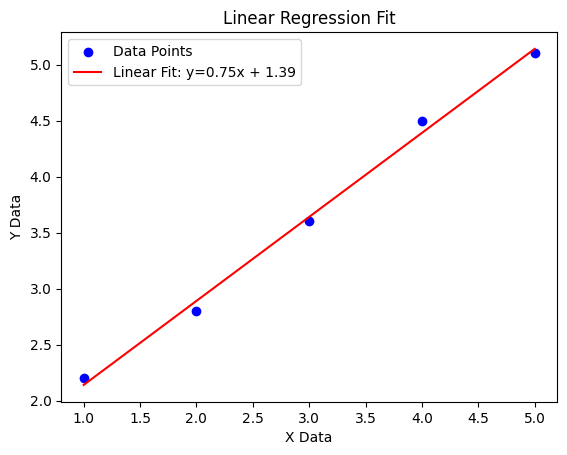

In [ ]:

import matplotlib.pyplot as plt

# Sample Data
x_data = np.array([1, 2, 3, 4, 5])
y_data = np.array([2.2, 2.8, 3.6, 4.5, 5.1])

# Calculate coefficients
beta_1, beta_0 = np.polyfit(x_data, y_data, 1)

# Predicted y values
y_pred = beta_1 * x_data + beta_0

# Plotting the data points
plt.scatter(x_data, y_data, color='blue', label='Data Points')

# Plotting the linear regression line
plt.plot(x_data, y_pred, color='red', label=f'Linear Fit: y={beta_1:.2f}x + {beta_0:.2f}')

# Setting labels and title
plt.xlabel('X Data')
plt.ylabel('Y Data')
plt.title('Linear Regression Fit')
plt.legend()

# Display the plot
plt.show()

##Linear Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Advertising.csv')
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
#sum all Media types to create only 1 independent var

df['total'] = df['TV'] + df['newspaper'] + df['radio']
df

,TV,radio,newspaper,sales,total
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


<Axes: xlabel='total', ylabel='sales'>

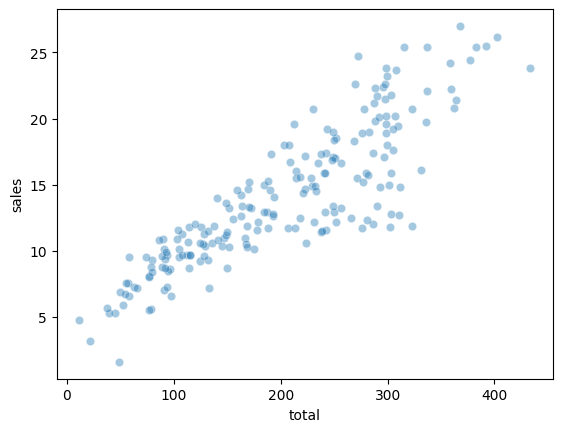

In [ ]:
sns.scatterplot(data=df, x="total", y="sales", alpha=0.4)

<Axes: xlabel='total', ylabel='sales'>

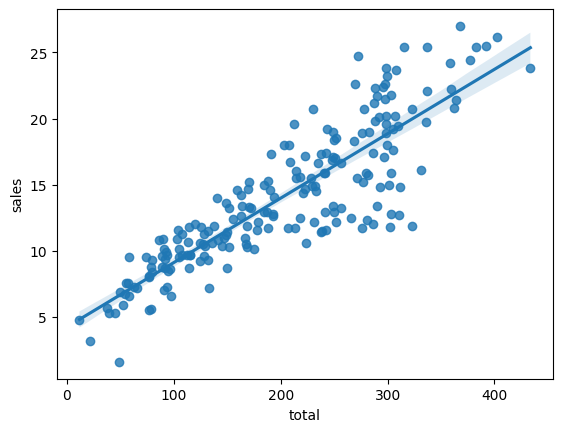

In [ ]:
sns.regplot(data=df, x="total", y="sales")

###calc b0 and b1

In [ ]:
X, y = df['total'], df['sales']

In [ ]:
##  y = b1*x + b0
b1, b0 = np.polyfit(x=X, y=y, deg=1)

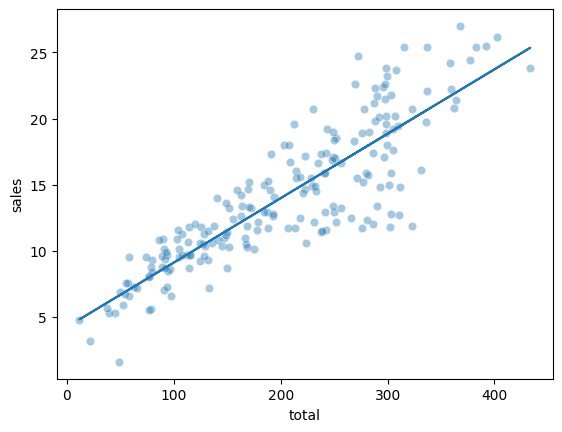

In [ ]:
res = b0 + b1*X
sns.scatterplot(data=df, x="total", y="sales", alpha=0.4)
plt.plot(X, res)

##Polynomial Regression


[Polynomial Regression](https://en.wikipedia.org/wiki/Polynomial_regression)

In [ ]:
##  y = b1*x + b0
##  y = b3*x**3 + b2*x**2 + b1*x + b0

In [ ]:
b3, b2, b1, b0 = np.polyfit(x=X, y=y, deg=3)
b3, b2, b1, b0

(3.076150330479741e-07,
 -0.00018939244934762303,
 0.08208863023067506,
 2.7049505259500446)

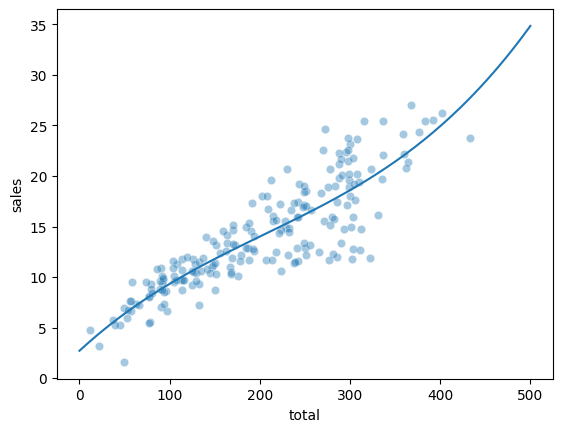

In [ ]:
spent = np.linspace(0,500,len(X))

res = b3*spent**3 + b2*spent**2 + b1*spent + b0

sns.scatterplot(data=df, x="total", y="sales", alpha=0.4)
plt.plot(spent, res)

In [ ]:
len(X)

200